<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Vector Representations
## *Data Science Unit 4 Sprint 2 Assignment 2*

In [1]:
import re
import string

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import spacy
nlp = spacy.load("en_core_web_lg")
from spacy.tokenizer import Tokenizer

from bs4 import BeautifulSoup

## 1) *Clean:* Job Listings from indeed.com that contain the title "Data Scientist" 

You have `job_listings.csv` in the data folder for this module. The text data in the description column is still messy - full of html tags. Use the [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) library to clean up this column. You will need to read through the documentation to accomplish this task. 

In [2]:
pip install request

Note: you may need to restart the kernel to use updated packages.


In [33]:
from bs4 import BeautifulSoup

##### Your Code Here #####

result = pd.read_csv("data\job_listings.csv", index_col='Unnamed: 0')
#raise Exception("\nThis task is not complete. \nReplace this line with your code for the task.")

result. head()

,description,title
0,"b""<div><div>Job Requirements:</div><ul><li><p>...",Data scientist
1,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...,Data Scientist I
2,b'<div><p>As a Data Scientist you will be work...,Data Scientist - Entry Level
3,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist
4,b'<ul><li>Location: USA \xe2\x80\x93 multiple ...,Data Scientist


In [34]:
result['title'].value_counts()

Data Scientist                                              150
Senior Data Scientist                                        14
Junior Data Scientist                                        10
Associate Data Scientist                                      8
Data Scientist Intern                                         7
                                                           ... 
Data Scientist Summer Intern                                  1
Data Analyst/Jr. Data Scientist                               1
Advisor: CCO Audience Strategy - Data Science                 1
2019 University Graduate - Data Scientist - Core Product      1
Associate Data Scientist - Associate Statistical Modeler      1
Name: title, Length: 177, dtype: int64

In [35]:
import re

def lower_word(text):
    """
    Converts a string into lower case form
    
    Args: 
        text(str): The string that the function will convert to lowercase
        
    Returns:
        list: lowercased versions 
    """
    
    lower = re.sub('[^a-zA-Z 0-9]', '', text)
    lower = lower.lower()
    
    return lower

In [36]:
result['title']= result['title'].apply(lower_word)
print(result.shape)
result.head()

(426, 2)


,description,title
0,"b""<div><div>Job Requirements:</div><ul><li><p>...",data scientist
1,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...,data scientist i
2,b'<div><p>As a Data Scientist you will be work...,data scientist entry level
3,"b'<div class=""jobsearch-JobMetadataHeader icl-...",data scientist
4,b'<ul><li>Location: USA \xe2\x80\x93 multiple ...,data scientist


In [37]:
result[result['title'].str.contains('data scientist')].head(2)

,description,title
0,"b""<div><div>Job Requirements:</div><ul><li><p>...",data scientist
1,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...,data scientist i


In [38]:
def beautify(text):
    """
    Extracts text from html string
    
    Args: 
        text(str): The html string
        
    Returns:
        string: Text of the html string 
    """
    
    text= BeautifulSoup(text).text
       
    return text

In [47]:
result['description']= result['description'].apply(beautify).apply(lower_word)
result.head()

,description,title
0,bjob requirementsnconceptual understanding in ...,data scientist
1,bjob descriptionnnas a data scientist 1 you wi...,data scientist i
2,bas a data scientist you will be working on co...,data scientist entry level
3,b4969 6756 a monthcontractunder the general s...,data scientist
4,blocation usa xe2x80x93 multiple locationsn2 y...,data scientist


In [48]:
result1= pd.DataFrame(result['description'])
print(result1.shape)
result1.head()

(426, 1)


,description
0,bjob requirementsnconceptual understanding in ...
1,bjob descriptionnnas a data scientist 1 you wi...
2,bas a data scientist you will be working on co...
3,b4969 6756 a monthcontractunder the general s...
4,blocation usa xe2x80x93 multiple locationsn2 y...


## 2) Use Spacy to tokenize the listings 

In [15]:
# Tokenizer
tokenizer = Tokenizer(nlp.vocab)

# Tokenizer Pipe
tokens = []

""" Make them tokens """
for doc in tokenizer.pipe(result1['description'], batch_size=500):
    doc_tokens = [token.text for token in doc]
    tokens.append(doc_tokens)

result1['description'] = tokens


In [16]:
result1['description'].head()

0    [bjob, requirementsnconceptual, understanding,...
1    [bjob, descriptionnnas, a, data, scientist, 1,...
2    [bas, a, data, scientist, you, will, be, worki...
3    [b4969,  , 6756, a, monthcontractunder, the, g...
4    [blocation, usa, xe2x80x93, multiple, location...
Name: description, dtype: object

## 3) Use Scikit-Learn's CountVectorizer to get word counts for each listing.

In [74]:
data= list(result1['description'])
len(data)

426

In [51]:
# Apply CountVectorizer to our Data
# Use custom Spacy Vectorizer


from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer(stop_words='english', max_features=1000)

#Learn our Vocab
vect.fit(data)

# Get sparse dtm
dtm_countvectorizer = vect.transform(data)



In [55]:
dtm_countvectorizer = pd.DataFrame(dtm_countvectorizer.todense(), columns=vect.get_feature_names())

In [56]:
dtm_countvectorizer.columns

Index(['10', '100', '2019', 'ab', 'abilities', 'ability', 'able', 'academic',
       'accelerate', 'access',
       ...
       'writing', 'written', 'xe2x80x93', 'xe2x80x94', 'year', 'years',
       'yearsxe2x80x99', 'york', 'youll', 'youxe2x80x99ll'],
      dtype='object', length=1000)

In [60]:
dtm_countvectorizer.head()

,10,100,2019,ab,abilities,ability,able,academic,accelerate,access,...,writing,written,xe2x80x93,xe2x80x94,year,years,yearsxe2x80x99,york,youll,youxe2x80x99ll
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,2,1,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0


## 4) Visualize the most common word counts


In [67]:
#Length of each document in the data list

doc_len = [len(doc) for doc in data]


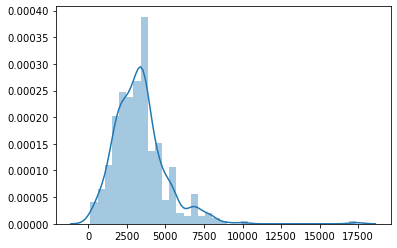

In [68]:
import seaborn as sns

sns.distplot(doc_len);

## 5) Use Scikit-Learn's tfidfVectorizer to get a TF-IDF feature matrix

In [41]:
# make a copy of the list of posts

post= result.copy()

In [82]:
post.head()

,description,title
0,bjob requirementsnconceptual understanding in ...,data scientist
1,bjob descriptionnnas a data scientist 1 you wi...,data scientist i
2,bas a data scientist you will be working on co...,data scientist entry level
3,b4969 6756 a monthcontractunder the general s...,data scientist
4,blocation usa xe2x80x93 multiple locationsn2 y...,data scientist


In [76]:
post_data = list(post['description'])
len(post_data)

426

In [81]:
# Apply TFIDF Vectorizer to our Data

from sklearn.feature_extraction.text import TfidfVectorizer

#Instantiate vectorizer object
tfidf= TfidfVectorizer(stop_words='english', max_features=5000)

#Create a vocabulaey and get word counts per document
#SImila to fit_prdict
dtm_tfidf= tfidf.fit_transform(post_data)

# Get feature names for DF column headers
dtm_tfidf= pd.DataFrame(dtm_tfidf.todense(), columns = tfidf.get_feature_names())

#View Feature Matrix as Dataframe
dtm_tfidf.head()

,10,100,1000,100000,11,12,13,15,17,18,...,youxe2x80x99ll,youxe2x80x99re,youxe2x80x99ve,yrs,zero,zeus,zf,zfxe2x80x99s,zillow,zuckerberg
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [88]:
# Tokenization function

def tokenize(document):
    doc = nlp(document)
    return [token.lemma_.strip() for token in doc if (token.is_stop !=True) and (token.is_punct !=True)]

In [89]:
# Tuning Parameters

# Instantiate vectorizer object
tfidf = TfidfVectorizer (stop_words = 'english',
                        ngram_range = (1,2),
                        max_df = .90,
                        min_df = 5,
                        tokenizer = tokenize)

# Create Vocabulary and get words per document
dtm= tfidf.fit_transform(post_data)

# Get Feature names for dataframe
dtm = pd.DataFrame(dtm.todense(), columns = tfidf.get_feature_names())

# View matrix
dtm.head()


,,ability,able,analytic,business,datum,deep,design,disability,gender,...,yearsxe2x80x99 experience,yes,york,york city,younnabout,youxe2x80x99ll,youxe2x80x99ll work,youxe2x80x99re,youxe2x80x99re look,youxe2x80x99ve
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.046252,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.066985,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Query using Cosine Similarity

In [92]:
# Calculate Distance of TF-IDF Vectors

from sklearn.metrics.pairwise import cosine_similarity

dist_matrix = cosine_similarity(dtm)

# Convert to a dataframe
dist_df = pd.DataFrame(dist_matrix)
print(dist_df.shape)
dist_df.head()

(426, 426)


,0,1,2,3,4,5,6,7,8,9,...,416,417,418,419,420,421,422,423,424,425
0,1.000000,0.062686,0.019679,0.002130,0.019917,0.071465,0.022006,0.034935,0.051274,0.027989,...,0.049541,0.068330,0.036639,0.072127,0.031811,0.027097,0.025850,0.028476,0.044234,0.047332
1,0.062686,1.000000,0.056919,0.040549,0.030598,0.094352,0.103249,0.088285,0.125112,0.092206,...,0.119533,0.150726,0.047212,0.112655,0.112788,0.120003,0.084317,0.086640,0.084154,0.087207
2,0.019679,0.056919,1.000000,0.014722,0.031885,0.075595,0.093346,0.098013,0.098792,0.034772,...,0.048253,0.042111,0.055500,0.112884,0.074692,0.050450,0.047375,0.030260,0.094717,0.065413
3,0.002130,0.040549,0.014722,1.000000,0.000000,0.042882,0.022569,0.112442,0.047550,0.091830,...,0.059923,0.043073,0.004891,0.072265,0.035651,0.088729,0.024723,0.108208,0.102136,0.150996
4,0.019917,0.030598,0.031885,0.000000,1.000000,0.049510,0.018818,0.029355,0.055395,0.018894,...,0.020516,0.109436,0.025194,0.098542,0.011704,0.023620,0.011017,0.014808,0.021802,0.049322


In [99]:
# pick a random document, and its first 200 charaters

post_data[1][:200]

'bjob descriptionnnas a data scientist 1 you will help us build machine learning models data pipelines and microservices to help our clients navigate their healthcare journey you will do so by empoweri'

In [96]:
# Compare cosine similarity of one document to other documents including itself

dist_df[1][:5]

0    0.062686
1    1.000000
2    0.056919
3    0.040549
4    0.030598
Name: 1, dtype: float64

In [98]:
# Grabbing the rows (document #) and their respective similarity factor

dist_df[dist_df[1]< 1] [0].sort_values(ascending = False)[:5]

0      1.000000
115    0.176574
274    0.141243
403    0.137347
366    0.123224
Name: 0, dtype: float64

In [102]:
# Check document 1 and its first 250 characters
post_data[1][:250]

'bjob descriptionnnas a data scientist 1 you will help us build machine learning models data pipelines and microservices to help our clients navigate their healthcare journey you will do so by empowering and improving the next generation of accolade a'

In [103]:
#Check document 115 and its first 259 characters with similarity = .176574

post_data[115][:250]

'bcompany overviewnat proofpoint we have a passion for protecting people data and brands from todayxe2x80x99s advanced threats and compliance risks we hire the best people in the business tonbuild and enhance our proven security platformnblend innovat'

## 6) Create a NearestNeighbor Model. Write the description of your ideal datascience job and query your job listings. 

In [104]:
from sklearn.neighbors import NearestNeighbors

# Instantiate
nn = NearestNeighbors(n_neighbors = 5, algorithm = 'kd_tree')

#Fit on dtm
nn.fit(dtm)

NearestNeighbors(algorithm='kd_tree', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [106]:
# Using kneighbors method on document 1

nn.kneighbors([dtm.iloc[1].values])

(array([[0.        , 1.25430488, 1.25820175, 1.25993861, 1.26407493]]),
 array([[  1, 201, 285, 222, 136]], dtype=int64))

In [109]:
# Checking document 201
nn.kneighbors([dtm.iloc[201].values])

(array([[0.        , 1.17204676, 1.1787021 , 1.18583977, 1.18738524]]),
 array([[201, 388, 199, 410, 285]], dtype=int64))

In [114]:
## Using Word2Vec and Spacy

# Choose random documents to compare
doc1 = post_data [1]
doc2 = post_data [115]

# Instantiate
doc_1 = nlp(doc1)
doc_2 = nlp(doc2)

# Load space large
nlp = spacy.load('en_core_web_lg')

#Get Similarity of the 2 documents
similarity = doc_1.similarity(doc_2)
print(similarity)

0.9893033210208009


In [112]:
# Instantiate doc 2, find vector of word "scienctist"
doc_2 = nlp(doc2)
scientst_vector= doc_2.vector
print(scientst_vector)

[-6.33773282e-02  9.85411108e-02 -8.75248313e-02 -5.38679846e-02
  5.68603911e-02  6.24825479e-03  1.30751533e-02  2.36527026e-02
  3.42778526e-02  1.80237198e+00 -1.75685152e-01 -3.04266233e-02
  1.63789047e-03  6.85209641e-03 -3.82980816e-02 -9.86630190e-03
 -5.38823307e-02  1.13142562e+00 -2.17665836e-01 -3.14682685e-02
  7.63125122e-02 -1.63216591e-02 -8.45363885e-02 -2.11601667e-02
  3.20174620e-02  5.36174774e-02  3.78496386e-02  4.39335853e-02
  2.82980166e-02 -5.03418483e-02 -2.26035137e-02  3.39438282e-02
  5.58888391e-02  1.96475331e-02  7.25855529e-02 -8.21302533e-02
  3.90268192e-02  3.14004556e-03 -2.43141130e-02 -9.49449241e-02
 -4.59842238e-04  4.91307378e-02 -3.57638560e-02 -3.27577405e-02
 -1.60543490e-02  4.89654541e-02 -4.16740030e-02  2.62202043e-02
 -3.04089184e-03 -9.29178018e-03  1.37257762e-02  7.04939337e-03
 -2.95064896e-02 -2.49132160e-02  4.83977085e-04  5.26955649e-02
 -3.97174880e-02 -2.10049879e-02  1.13644497e-03 -8.49819649e-03
  4.77898009e-02  5.52834

## Using PCA Module

In [116]:
# Using PCA to reduce dimensionality

from sklearn.decomposition import PCA

def get_word_vectors(words):
    """
    Converts lists of words into their word vectors
    """
    return [nlp(word).vector for word in words]

words = ['father', 'mother', 'sister', 'brother', 'dog', 'cat', 'tiger', 'wood', 'steel', 'plastic', 'yahoo', 'google', 'box', 'treasure']


#  Instantiate with 2 components
pca = PCA(n_components = 2)

# fit model into the 300D data
pca.fit(get_word_vectors(words))

# Transform the model from 300 to 2D
word_vecs_2d = pca.transform(get_word_vectors(words))

#Check 2D word vectors
word_vecs_2d

array([[-3.70477835, -2.19513068],
       [-3.37020811, -1.75013531],
       [-3.54559841, -1.16412567],
       [-3.62084964, -1.50527144],
       [-0.62512594,  0.79895934],
       [-0.34755409,  1.16300001],
       [ 0.17686143,  0.96009669],
       [ 3.77520309, -2.14996147],
       [ 4.66454546, -2.80639765],
       [ 3.87493691, -1.71572379],
       [ 0.54697057,  4.85117959],
       [ 0.2833711 ,  4.70106424],
       [ 1.91563321,  0.52295247],
       [-0.02340722,  0.28949366]])

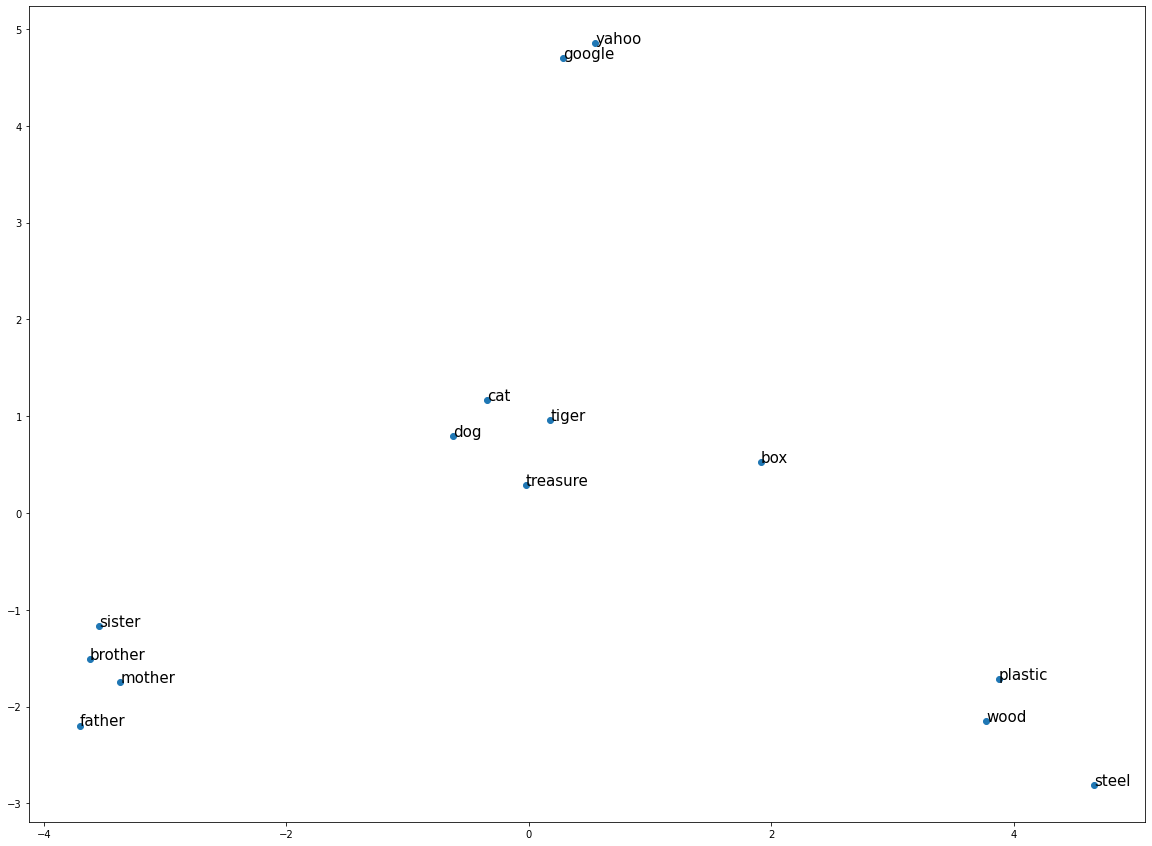

In [119]:
# Visualize

plt.figure (figsize = (20, 15))

plt.scatter(word_vecs_2d[:,0], word_vecs_2d[:, 1])

#Fpr each word and coordinate pair, draw the text on the plot

for word , coord in zip(words, word_vecs_2d):
    x, y = coord
    plt.text(x, y, word, size = 15)
    
# Show plot
plt.show()


## Extracting Document Vectors

In [121]:
# Extract vectors from each document

X = [nlp(str(d)).vector for d in post_data]

# Create a dataframe

df = pd.DataFrame(X)
print(df.shape)
df.head(2)

(426, 300)


,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,-0.050637,0.041950,-0.077839,0.010917,0.036732,0.099972,0.024334,-0.023894,-0.001443,1.345611,...,-0.086106,-0.006543,-0.023529,0.046293,-0.051147,-0.048961,-0.011982,-0.011932,0.014677,0.153257
1,-0.051142,0.100185,-0.080484,-0.025255,0.062853,-0.015368,0.013116,0.009004,0.052784,1.911892,...,-0.228914,0.031553,0.042381,0.005309,-0.003723,-0.030546,0.032712,-0.016989,-0.004146,0.105353


## Stretch Goals

 - Try different visualizations for words and frequencies - what story do you want to tell with the data?
 - Scrape Job Listings for the job title "Data Analyst". How do these differ from Data Scientist Job Listings
 - Try and identify requirements for experience specific technologies that are asked for in the job listings. How are those distributed among the job listings?
 - Use a clustering algorithm to cluster documents by their most important terms. Do the clusters reveal any common themes?
  - **Hint:** K-means might not be the best algorithm for this. Do a little bit of research to see what might be good for this. Also, remember that algorithms that depend on Euclidean distance break down with high dimensional data.
 - Create a labeled dataset - which jobs will you apply for? Train a model to select the jobs you are most likely to apply for. :) 